In [25]:
!pip install matplotlib pandas scikit-learn seaborn graphviz

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image, display
from graphviz import Source


In [27]:
# Load the dataset
file_path = "../Data/processed.cleveland.data"

columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target",
]

df = pd.read_csv(file_path, names=columns, na_values="?")

# Drop rows with missing values
df.dropna()
display(df)

# Convert categorical variables to category type
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
df["target_label"] = df["target"].map({0: "No Heart Disease", 1: "Heart Disease"})

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6.0       0  
1      2.0  3.0   3.0       2  
2      2.0  2.0   7.0       1  
3      3.0  0.0   3.0       0  
4      1.0  0.0   3.0       0  
..     ...  ...   ...     ...  
298    2.0  0.0   7.0       1  
299    2.0  2.0   7.0       2  
300    2.0  1.0   7.0       3  
301    2.0  1.0   3.0       1  
302    1.0  NaN   3.0       0  

[303 rows x 14 columns]

In [28]:
# Feature and label separation
feature = df.drop(["target", "target_label"], axis=1)
label = df["target"]

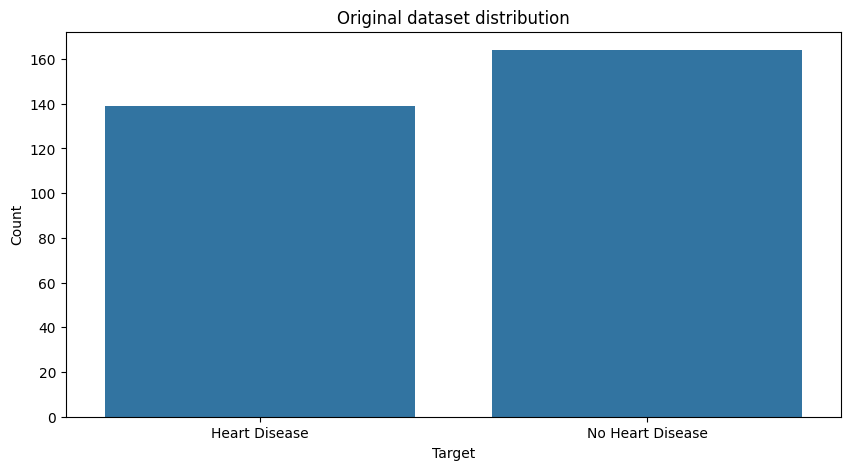

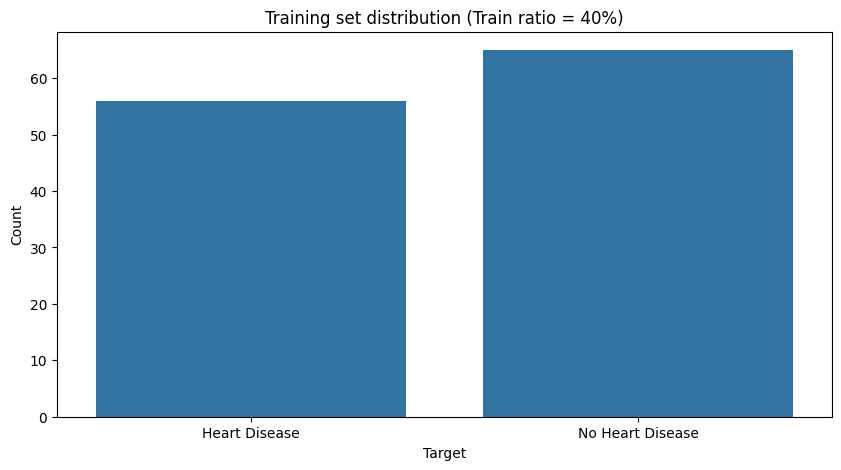

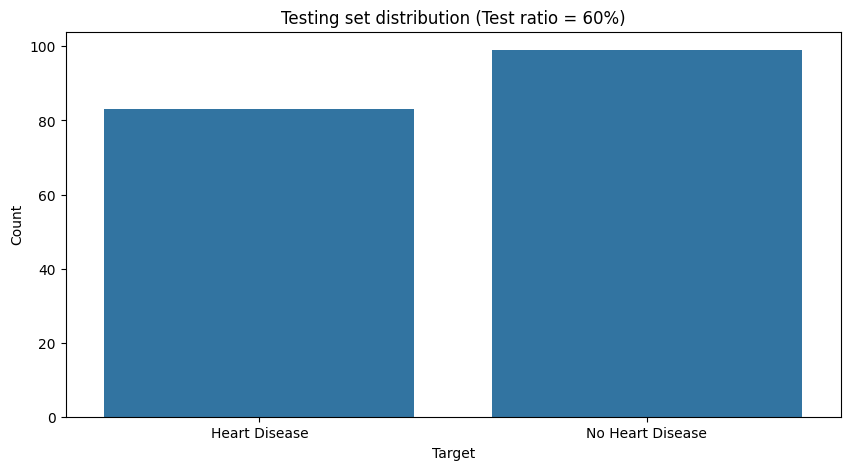

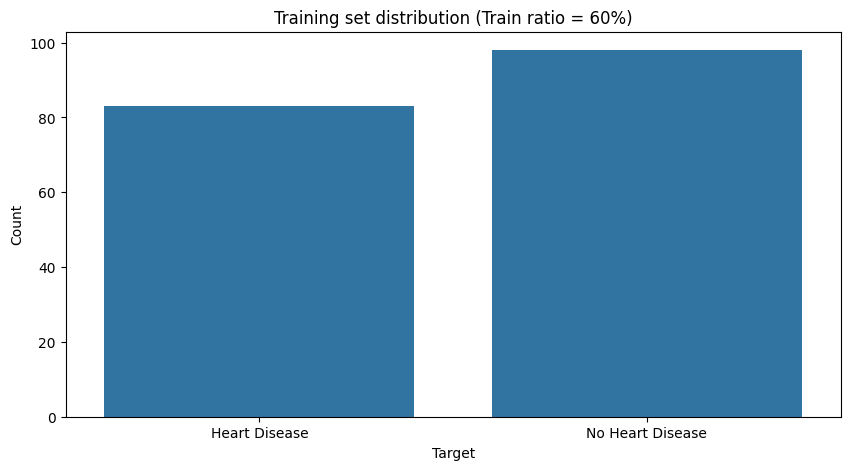

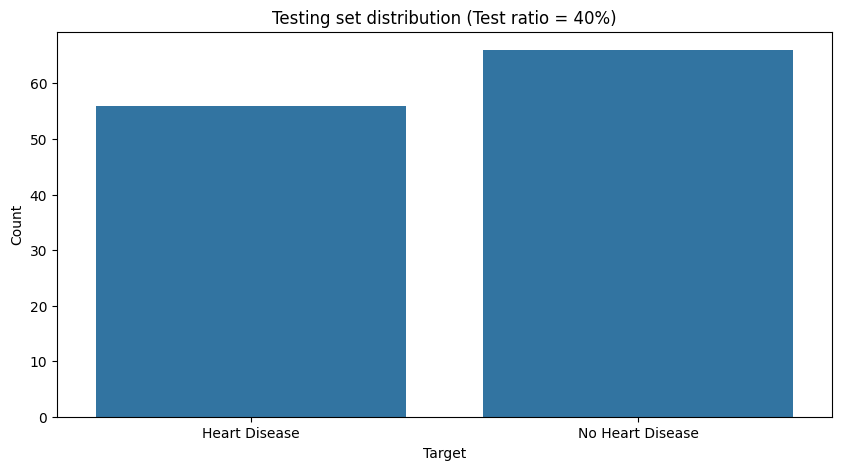

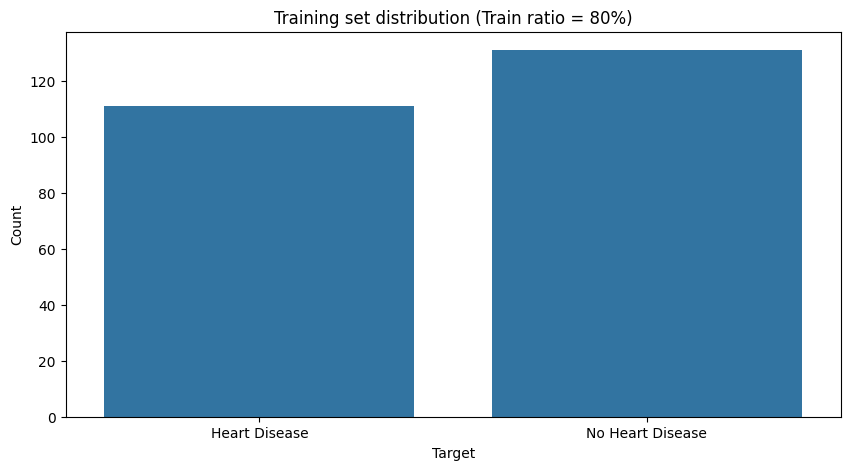

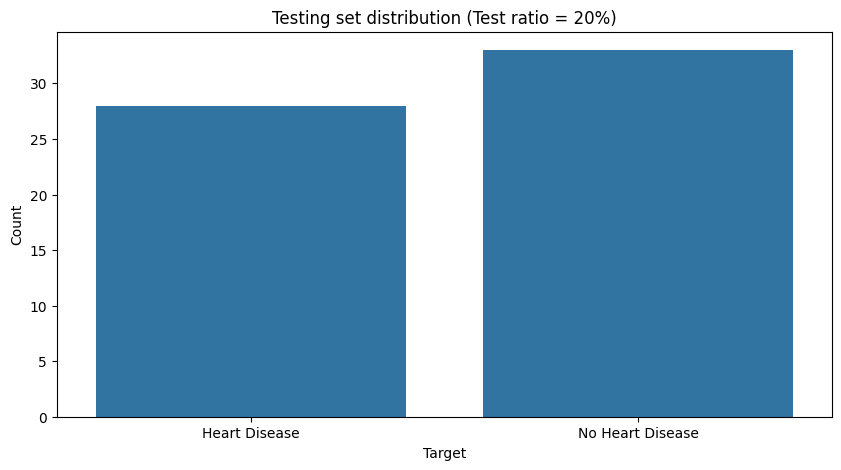

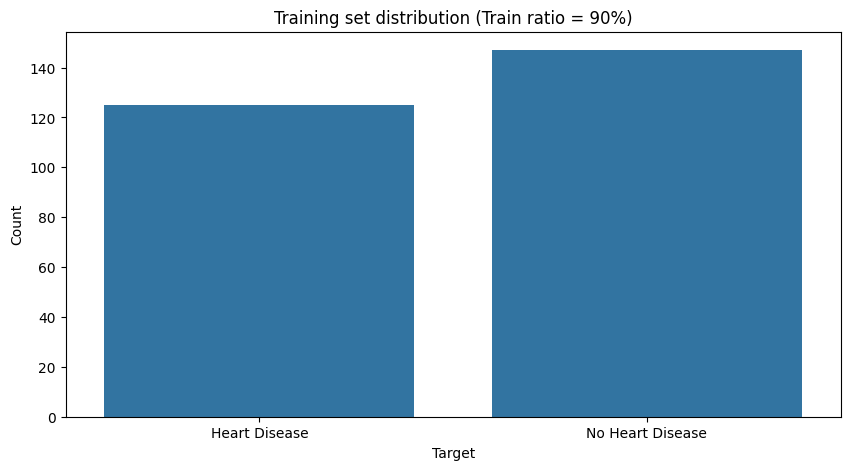

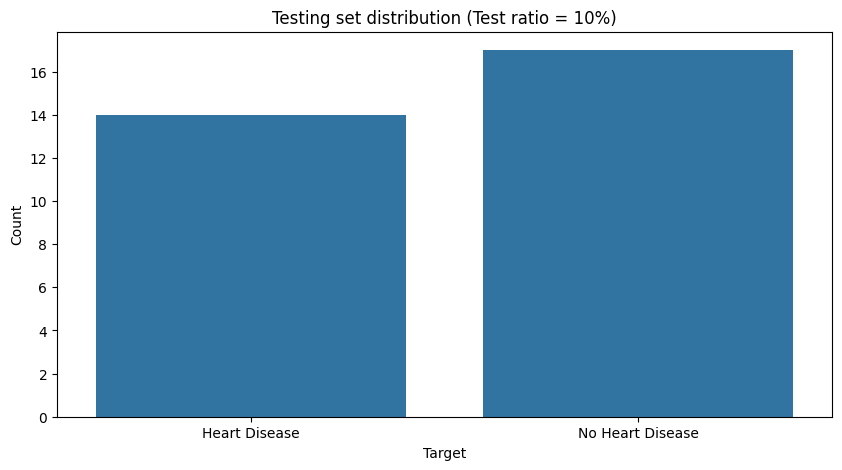

In [29]:
# Train-test split
order = ["Heart Disease", "No Heart Disease"] 

# Save split original dataset
split_dir = "../images/HeartDisease/SplitDataset"

os.makedirs(split_dir, exist_ok=True)

original_split_file_name = "original.png"
original_split_file_path = os.path.join(split_dir, original_split_file_name)

plt.figure(figsize=(10, 5))
sns.countplot(x=df["target_label"], order=order)
plt.title("Original dataset distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig(original_split_file_path)
plt.show()

splits = [0.4, 0.6, 0.8, 0.9]
split_results = {}

for train_ratio in splits:
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, train_size=train_ratio, random_state=42, stratify=label, shuffle=True
    )

    split_results[train_ratio] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test,
    }

    # Convert labels to readable format for visualization
    label_train_named = label_train.map({0: "No Heart Disease", 1: "Heart Disease"})
    label_test_named = label_test.map({0: "No Heart Disease", 1: "Heart Disease"})

    # Save train split dataset
    train_split_file_name = f"train_{int(train_ratio * 100)}.png"
    train_split_file_path = os.path.join(split_dir, train_split_file_name)

    # Visualize trainning and testing set distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_train_named, order=order)
    plt.title(f"Training set distribution (Train ratio = {int(train_ratio * 100)}%)")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.savefig(train_split_file_path)
    plt.show()

    # Save test split dataset
    test_split_file_name = f"test_{100 - int(train_ratio * 100)}.png"
    test_split_file_path = os.path.join(split_dir, test_split_file_name)

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_test_named, order=order)
    plt.title(f"Testing set distribution (Test ratio = {100 - int(train_ratio * 100)}%)")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.savefig(test_split_file_path)
    plt.show()

Accuracy (train_ratio=0.4): 0.73
              precision    recall  f1-score   support

           0       0.80      0.68      0.73        99
           1       0.67      0.80      0.73        83

    accuracy                           0.73       182
   macro avg       0.74      0.74      0.73       182
weighted avg       0.74      0.73      0.73       182



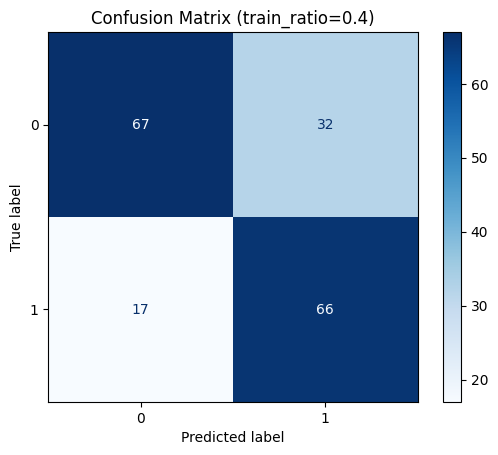

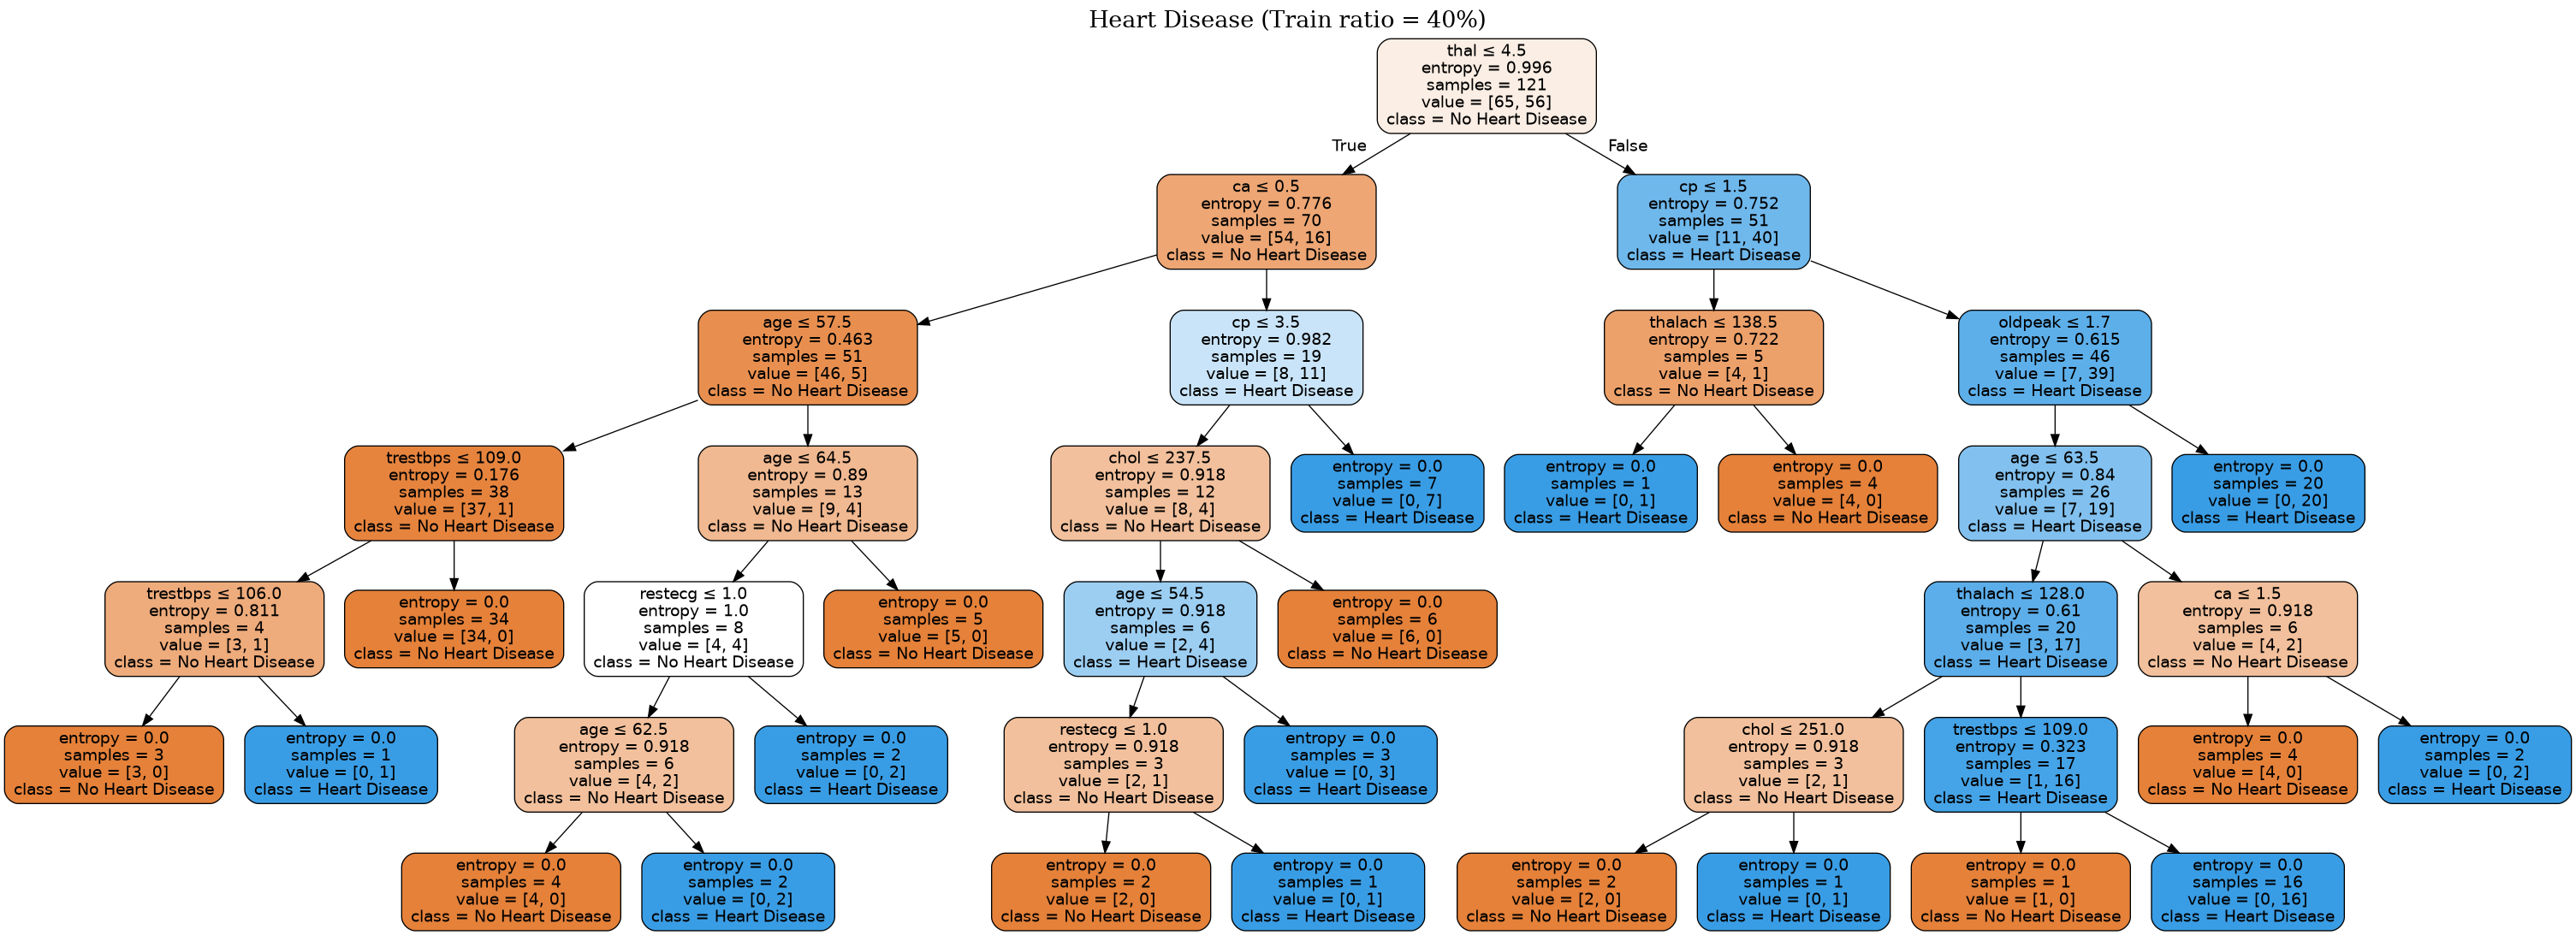

Accuracy (train_ratio=0.6): 0.75
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        66
           1       0.72      0.77      0.74        56

    accuracy                           0.75       122
   macro avg       0.75      0.76      0.75       122
weighted avg       0.76      0.75      0.75       122



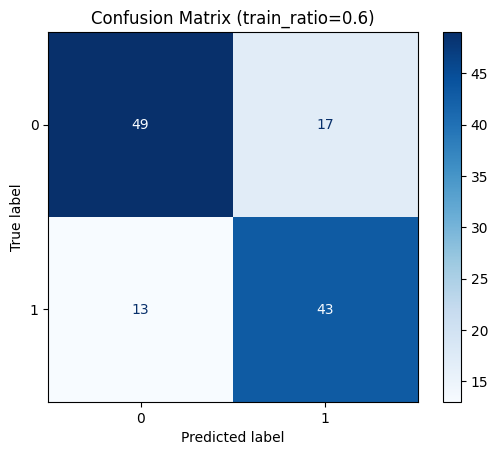

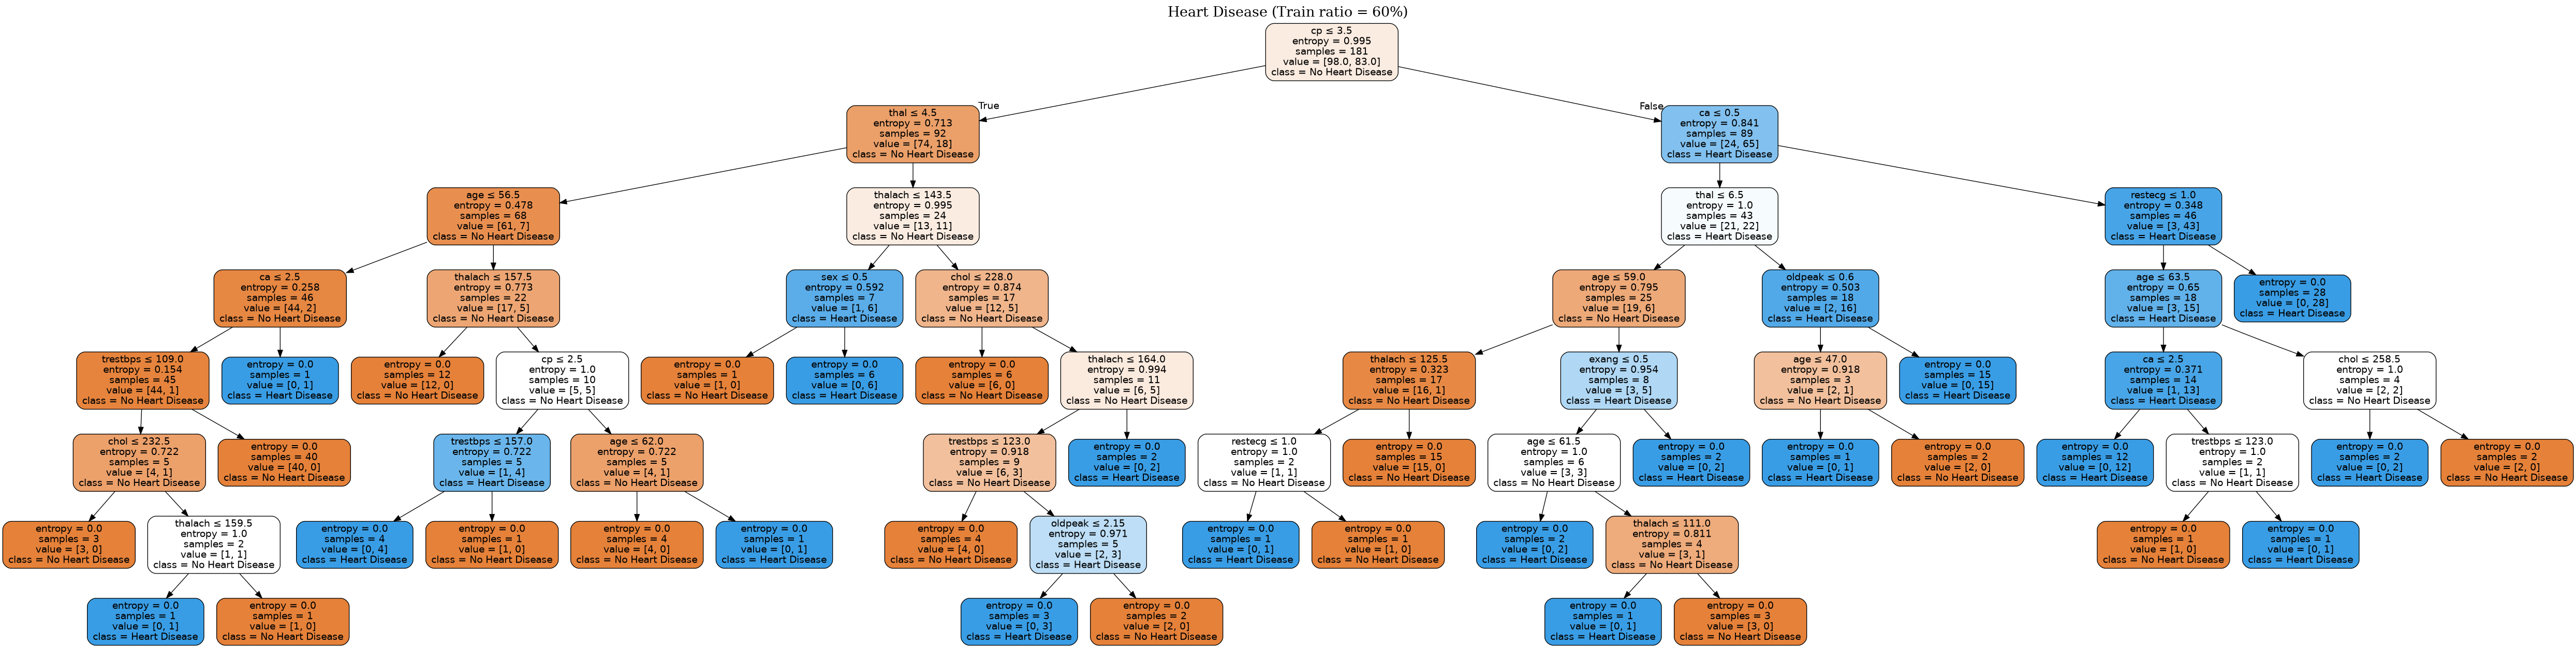

Accuracy (train_ratio=0.8): 0.77
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



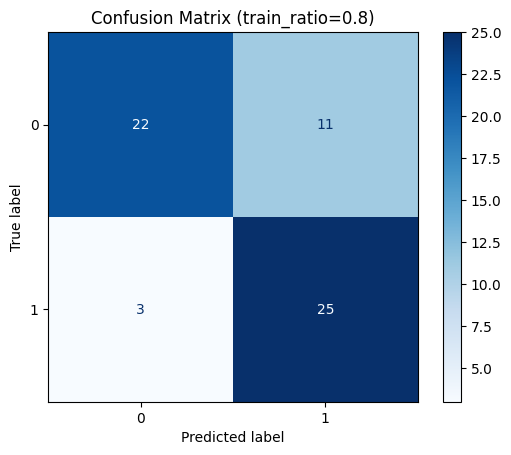

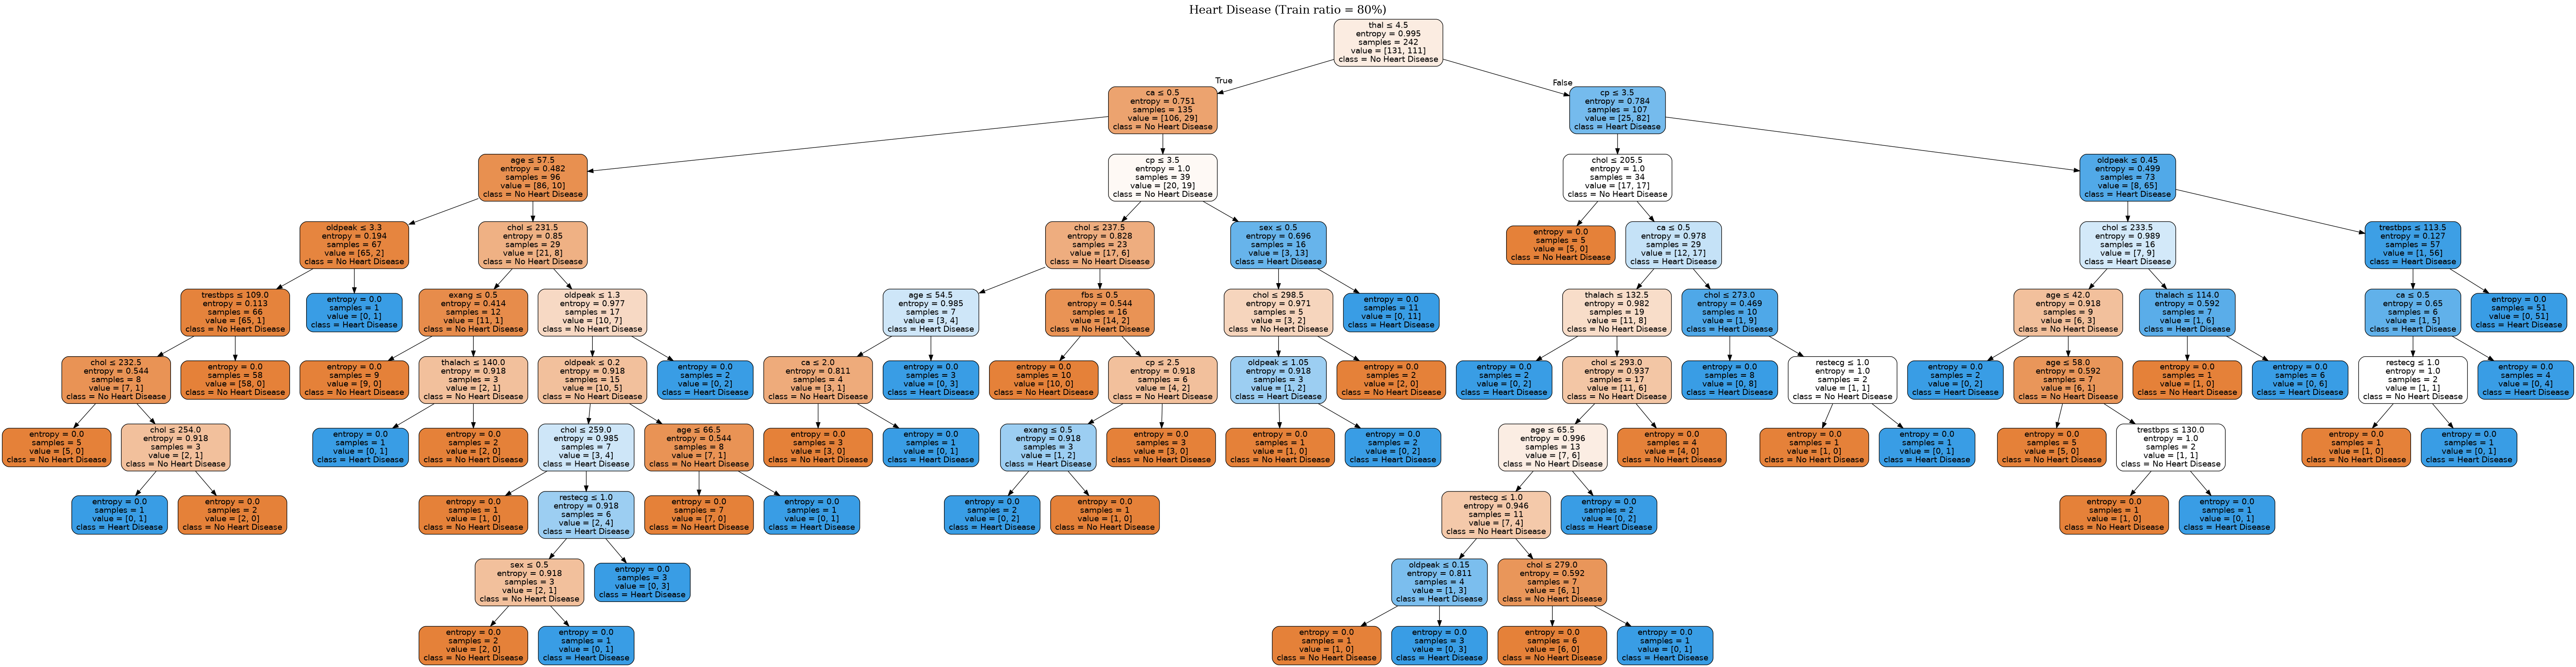

Accuracy (train_ratio=0.9): 0.74
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.65      0.93      0.76        14

    accuracy                           0.74        31
   macro avg       0.78      0.76      0.74        31
weighted avg       0.79      0.74      0.74        31



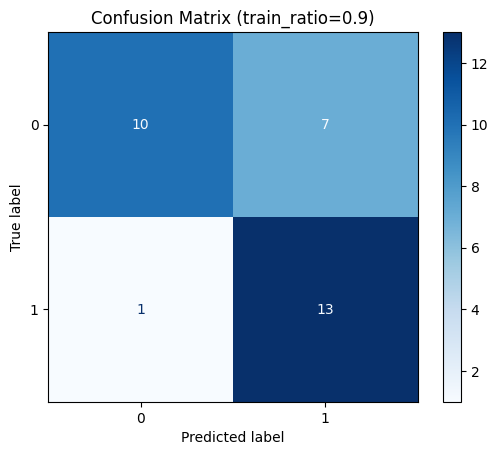

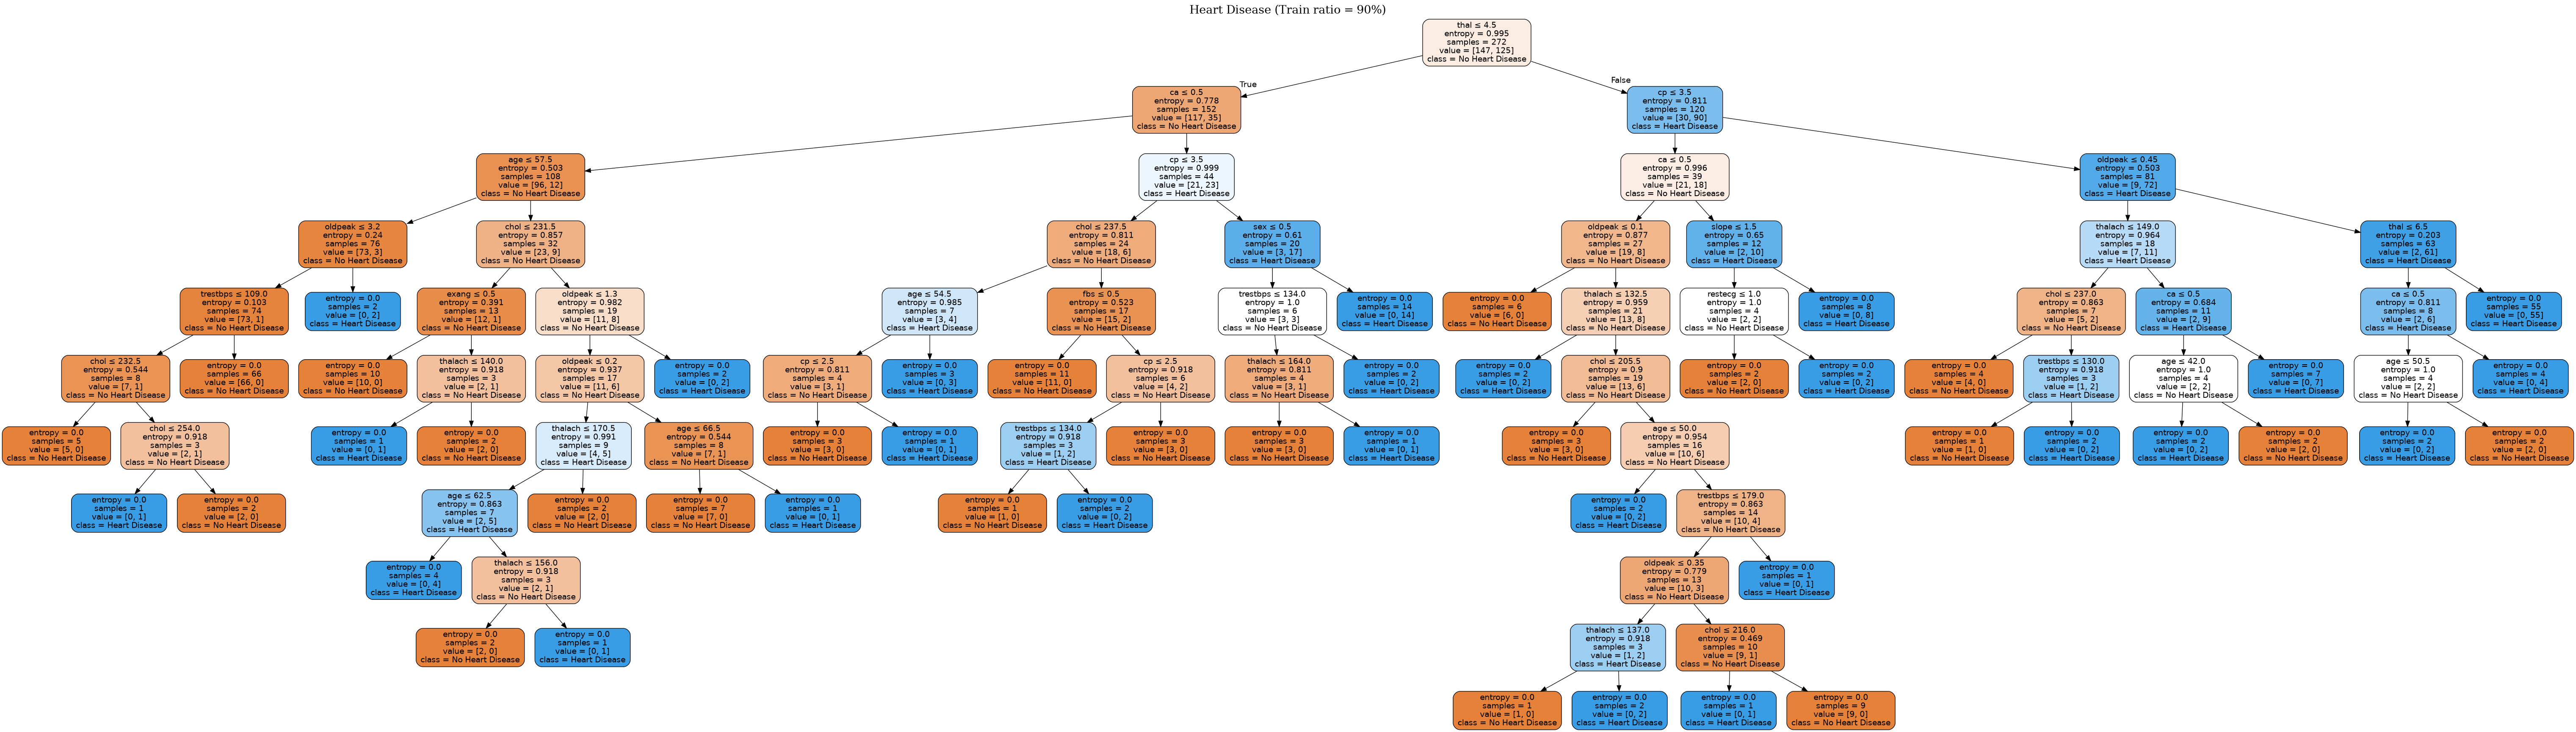

In [30]:
# Decision Tree Classifier
for train_ratio, data in split_results.items():
    feature_train = data["feature_train"]
    label_train = data["label_train"]
    feature_test = data["feature_test"]
    label_test = data["label_test"]

    # Create and train the model
    clf_split = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf_split.fit(feature_train, label_train)

    # Make predictions
    label_pred = clf_split.predict(feature_test)

    # Evaluation
    ## Accuracy
    accuracy = accuracy_score(label_test, label_pred)
    print(f"Accuracy (train_ratio={train_ratio}): {accuracy:.2f}")

    ## Classification report
    report = classification_report(label_test, label_pred)
    print(report)

    ## Confusion matrix
    matrix_dir = "../images/HeartDisease/ConfusionMatrix"
    os.makedirs(matrix_dir, exist_ok=True)

    matrix_file_name = f"confusion_matrix_{int(train_ratio * 100)}"
    matrix_file_path = os.path.join(matrix_dir, matrix_file_name)

    cm = confusion_matrix(label_test, label_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_split.classes_)
    disp.plot(cmap= plt.cm.Blues)
    plt.title(f"Confusion Matrix (train_ratio={train_ratio})")
    plt.savefig(matrix_file_path)
    plt.show()

    # Visualize the decision tree
    ## Save decision trees
    dtree_split_dir = "../images/HeartDisease/DecisionTree/Split"
    os.makedirs(dtree_split_dir, exist_ok=True)

    dtree_split_file_name = f"dtree_{int(train_ratio * 100)}"
    dtree_split_file_path = os.path.join(dtree_split_dir, dtree_split_file_name)

    ## Title for the graph
    title = f"Heart Disease (Train ratio = {int(train_ratio * 100)}%)"

    ## Create the decision tree graph
    dot_data = export_graphviz(
        clf_split,
        out_file=None,
        feature_names= feature.columns,
        class_names= ["No Heart Disease", "Heart Disease"],
        filled=True,
        rounded=True,
        special_characters=True
    )

    ## Add title to the graph
    dot_data_with_title = dot_data.replace(
        "digraph Tree {",
        f'digraph Tree {{\ngraph [label="{title}", labelloc=top, fontsize=20];'
    )

    ## Render the graph
    graph = Source(dot_data_with_title)
    graph.render(dtree_split_file_path, format="png", cleanup=True)
    display(Image(filename=f"{dtree_split_file_path}.png"))

Max Depth: None, Accuracy: 0.77


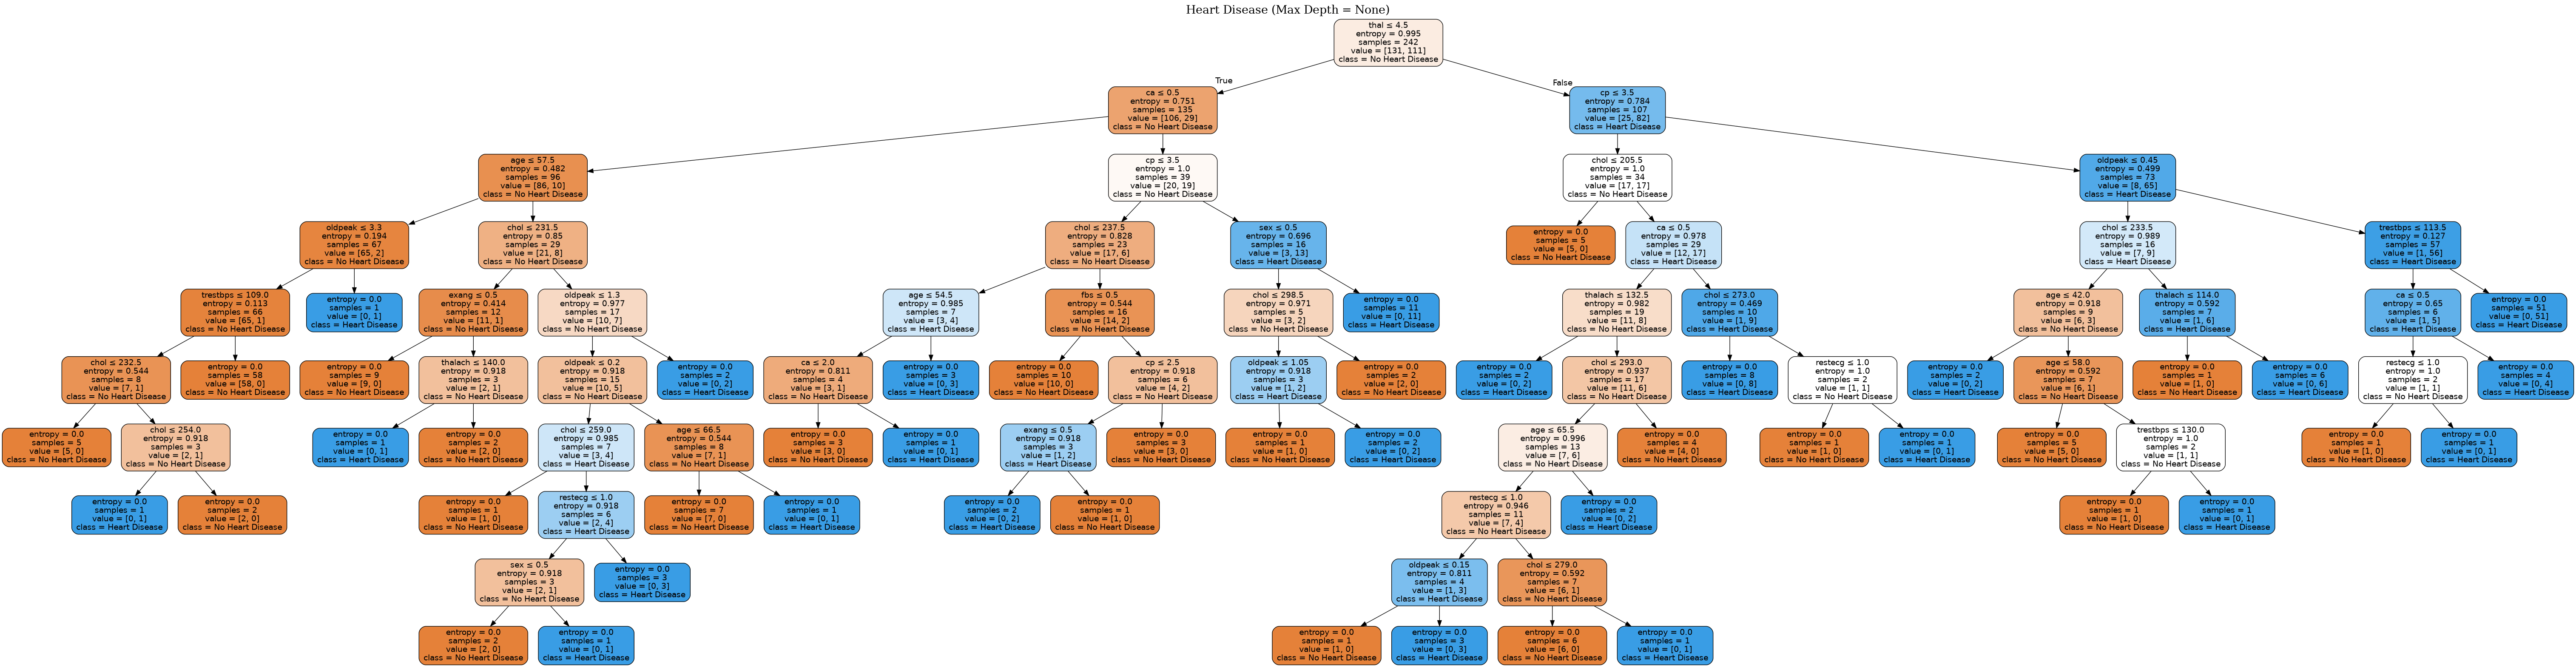

Max Depth: 2, Accuracy: 0.77


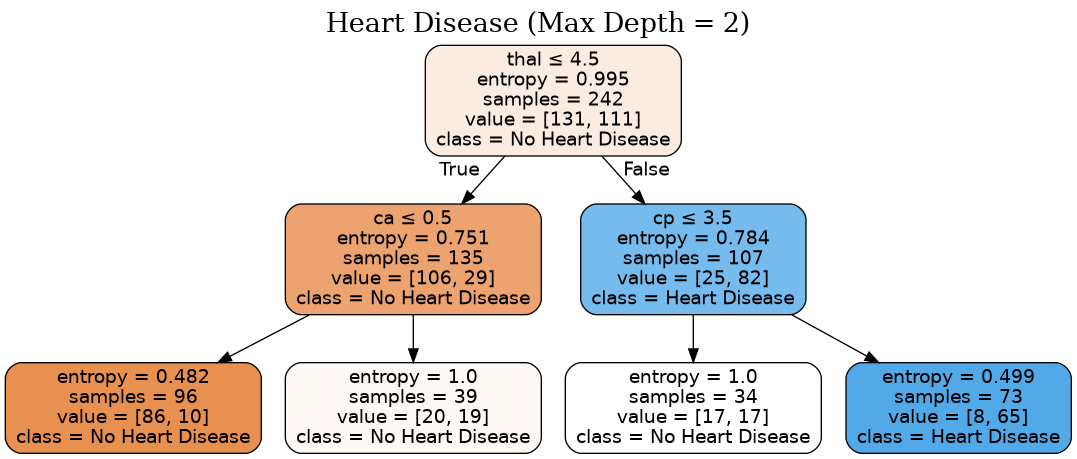

Max Depth: 3, Accuracy: 0.79


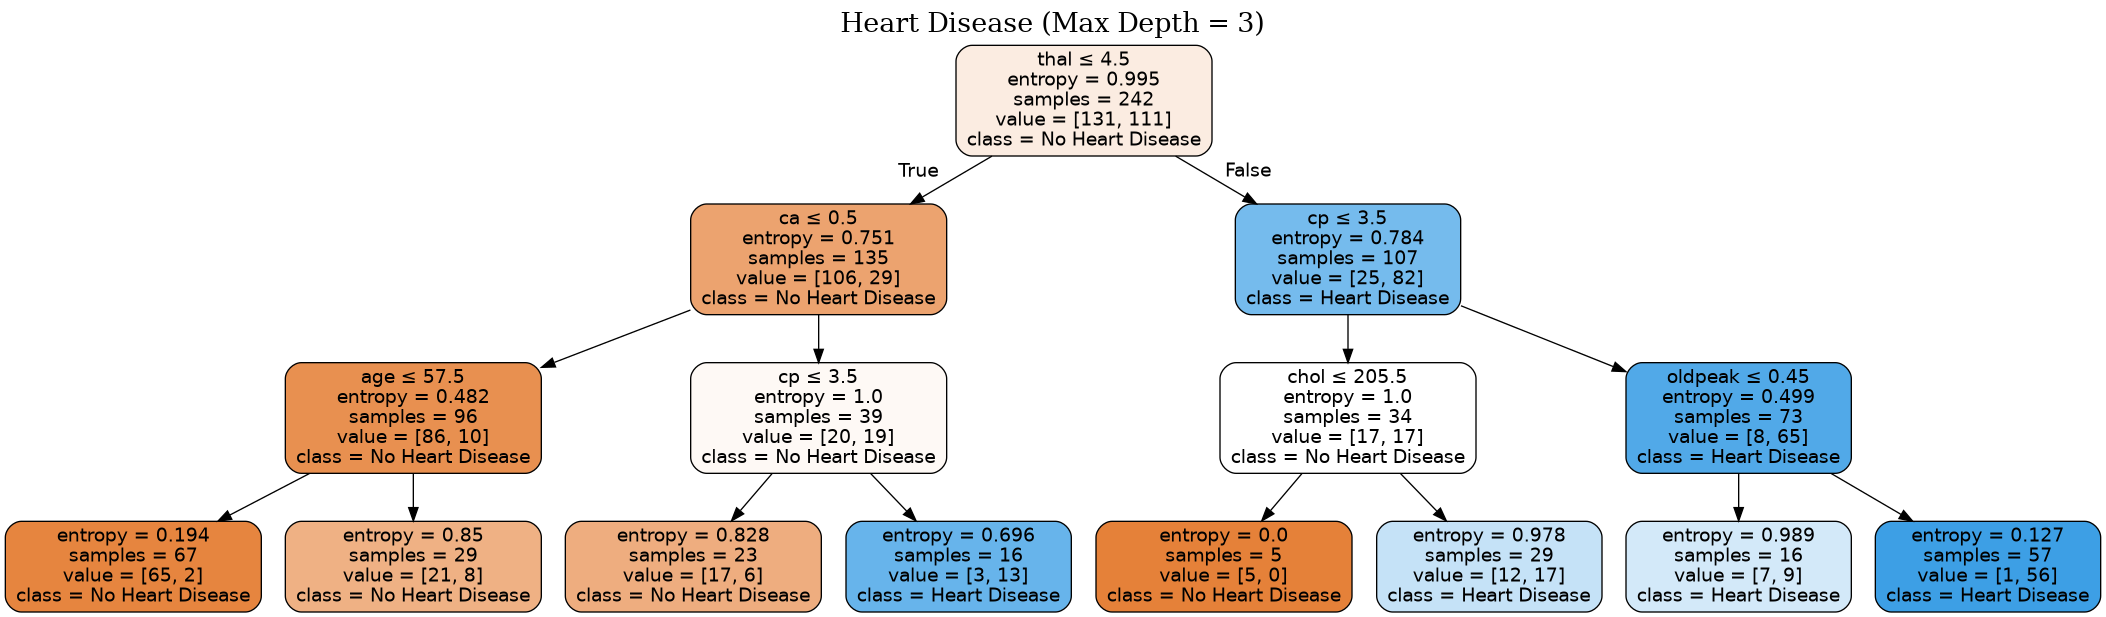

Max Depth: 4, Accuracy: 0.79


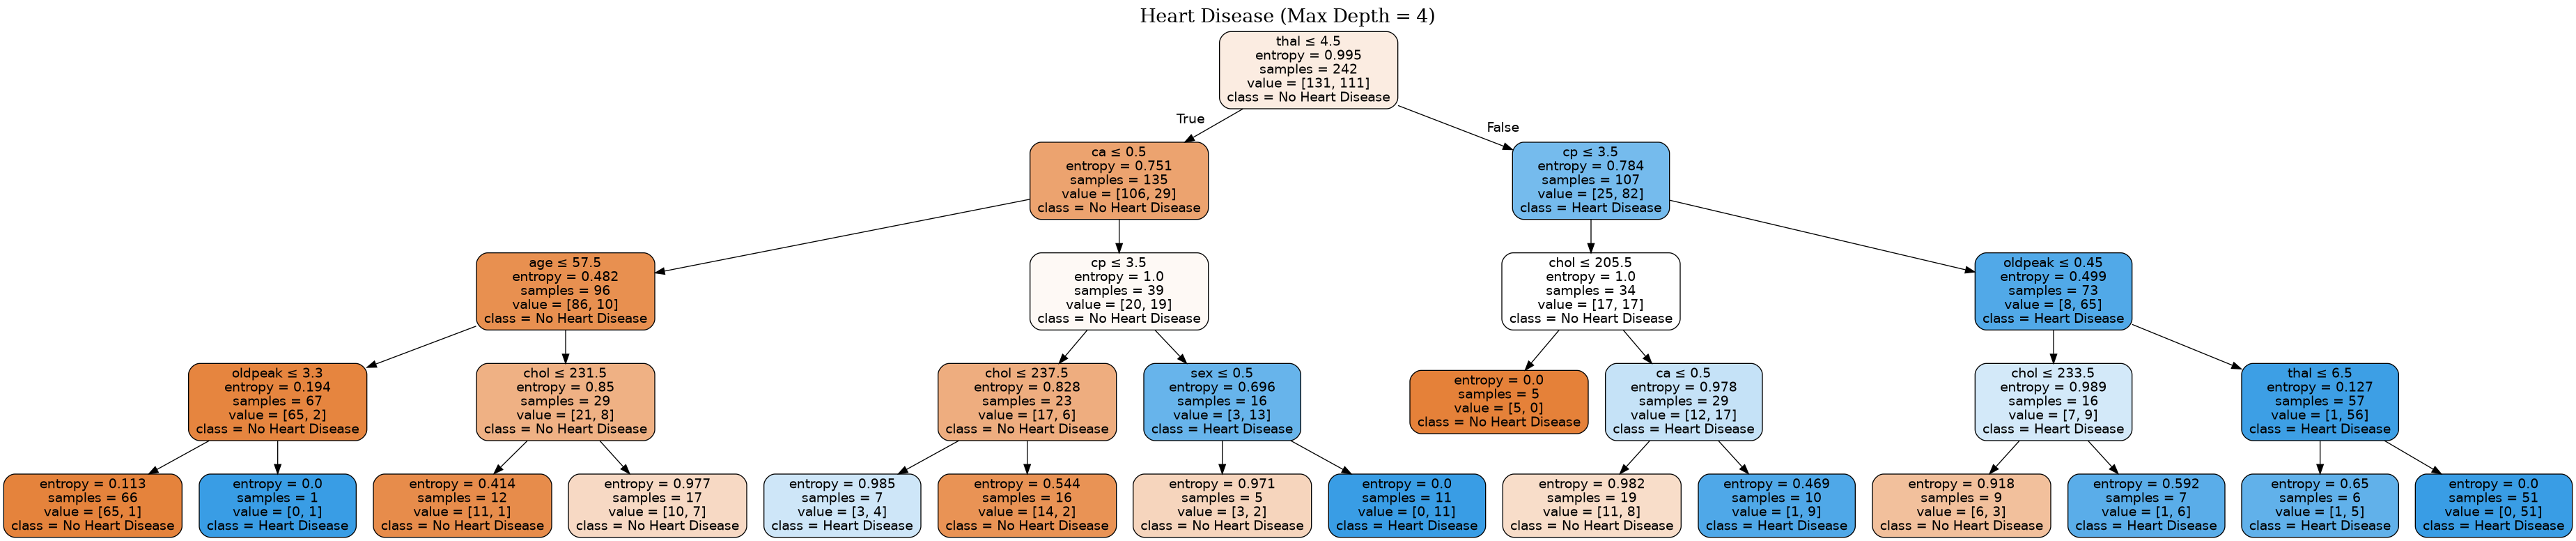

Max Depth: 5, Accuracy: 0.80


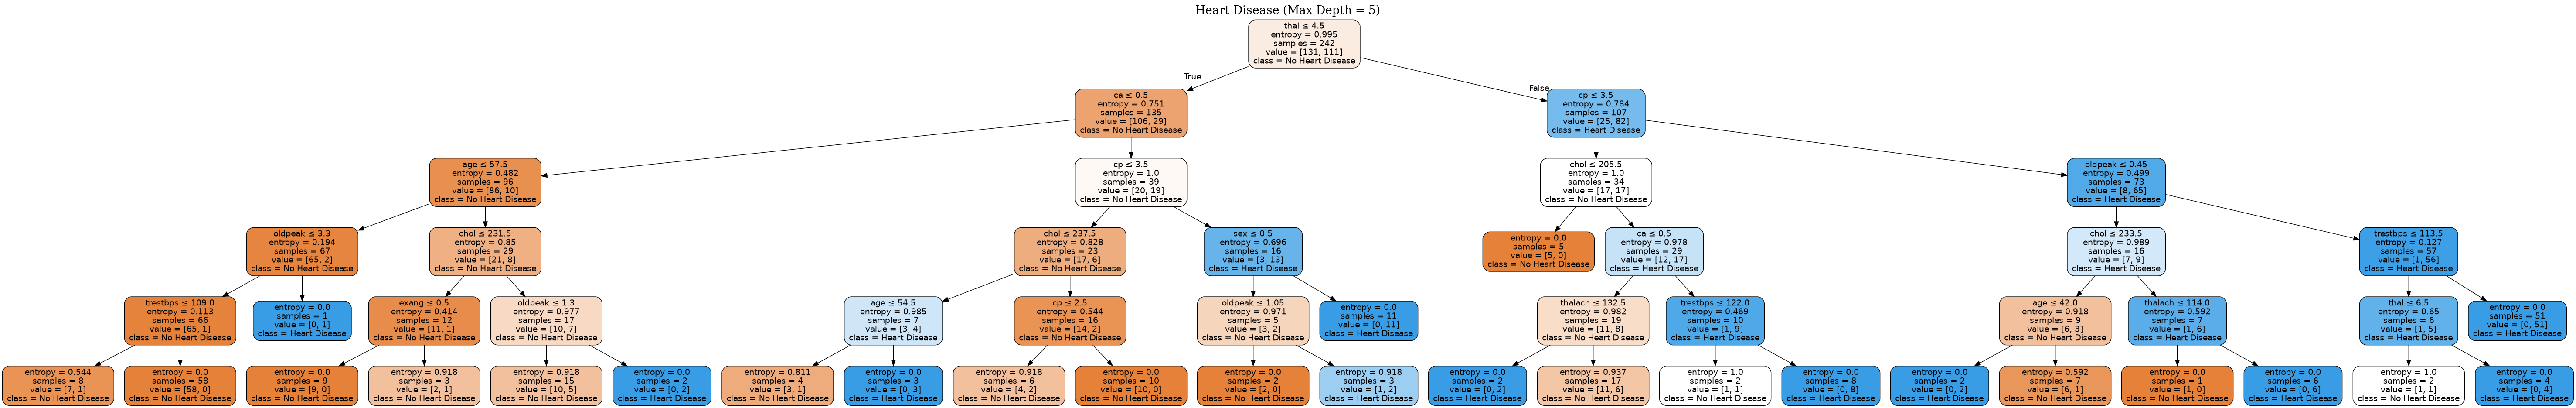

Max Depth: 6, Accuracy: 0.70


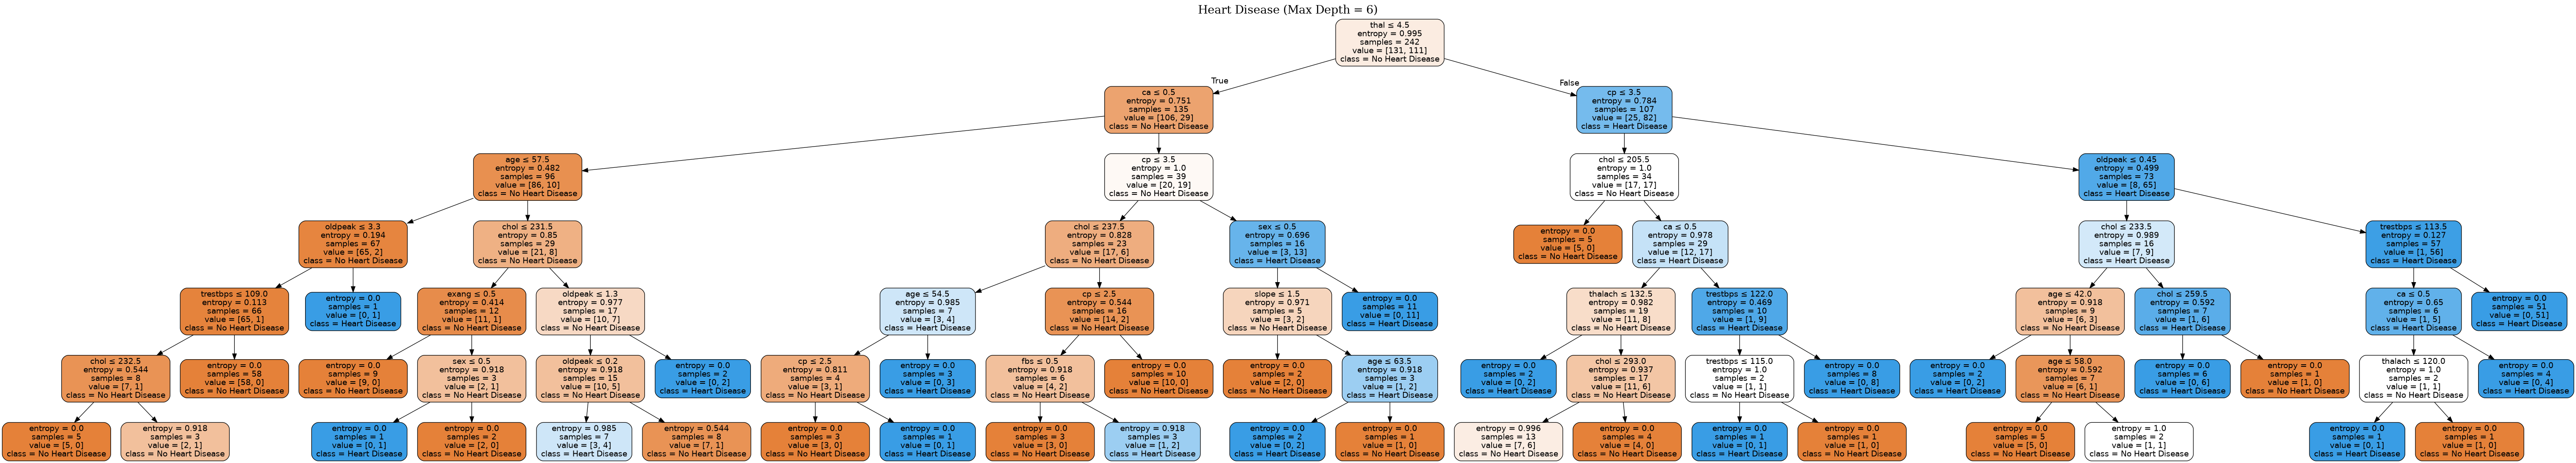

Max Depth: 7, Accuracy: 0.69


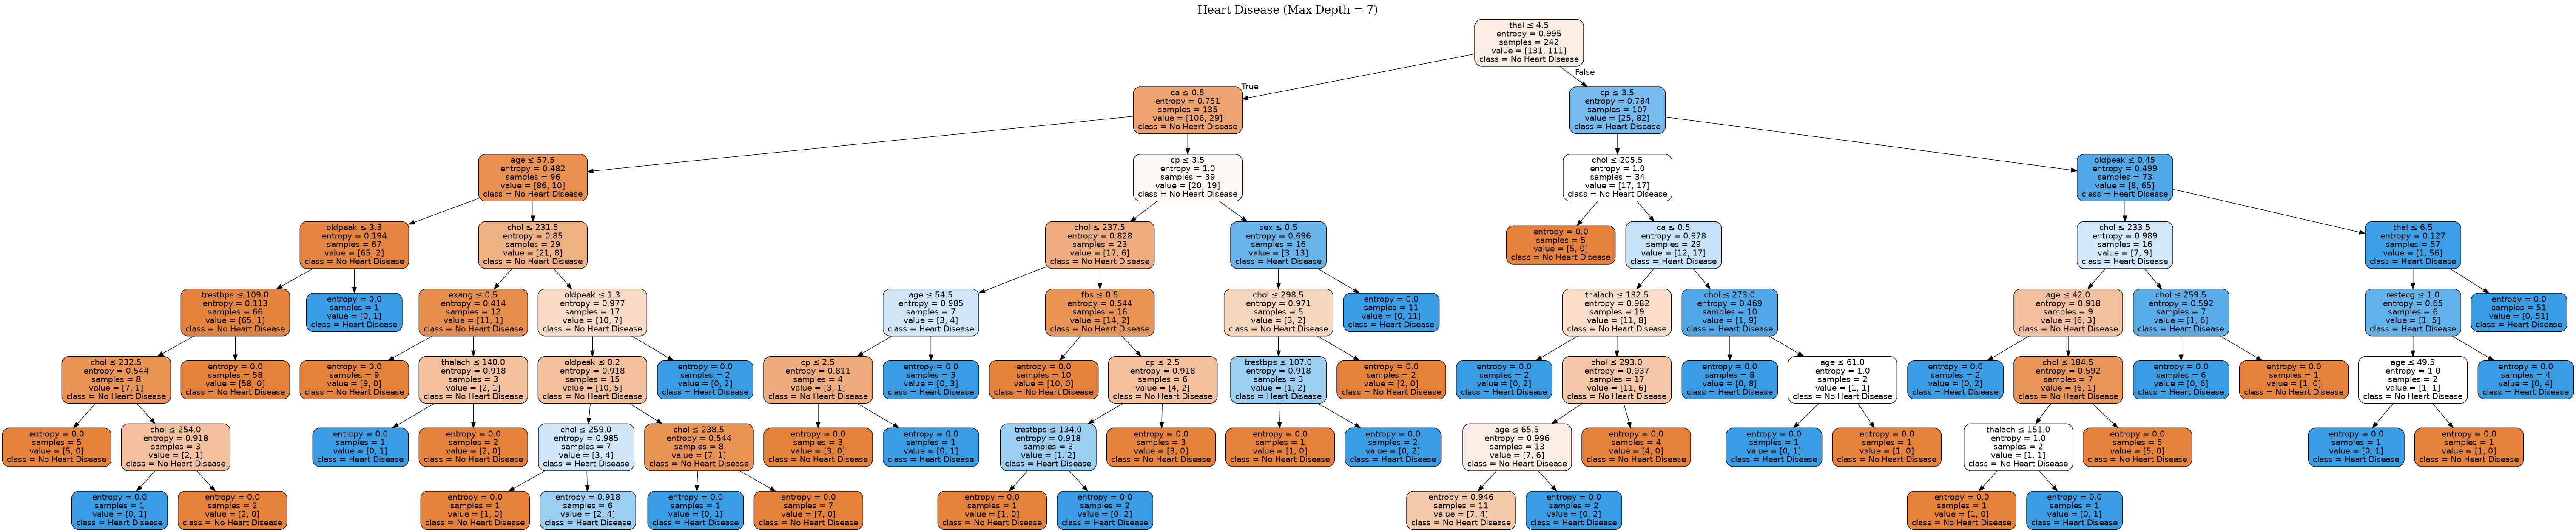

              None         2         3         4         5         6         7
accuracy  0.770492  0.770492  0.786885  0.786885  0.803279  0.704918  0.688525


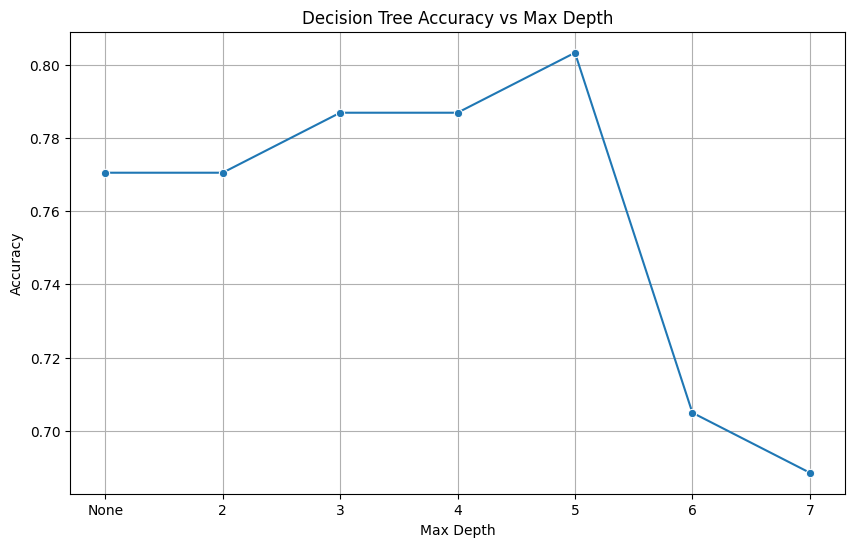

In [31]:
# Analyze accuracy vs max_depth
split_80 = split_results[0.8]
feature_train = split_80["feature_train"]
feature_test = split_80["feature_test"]
label_train = split_80["label_train"]
label_test = split_80["label_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
depth_results = {}

for max_depth in max_depths:
    # Train
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    clf_max_depth.fit(feature_train, label_train)

    # Test
    prediction = clf_max_depth.predict(feature_test)
    
    # Evaluate
    accuracy = accuracy_score(label_test, prediction)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.2f}")
    depth_results[str(max_depth)] = accuracy

    # Visualize the decision tree
    ## Save decision trees
    dtree_max_depth_dir = "../images/HeartDisease/DecisionTree/MaxDepth"
    os.makedirs(dtree_max_depth_dir, exist_ok=True)

    dtree_max_depth_file_name = f"dtree_{max_depth}"
    dtree_max_depth_file_path = os.path.join(dtree_max_depth_dir, dtree_max_depth_file_name)

    ## Title for the graph
    title = f"Heart Disease (Max Depth = {max_depth})"

    ## Create the decision tree graph
    dot_data = export_graphviz(
        clf_max_depth,
        out_file=None,
        feature_names= feature.columns,
        class_names= ["No Heart Disease", "Heart Disease"],
        filled=True,
        rounded=True,
        special_characters=True
    )

    ## Add title to the graph
    dot_data_with_title = dot_data.replace(
        "digraph Tree {",
        f'digraph Tree {{\ngraph [label="{title}", labelloc=top, fontsize=20];'
    )

    ## Render the graph
    graph = Source(dot_data_with_title)
    graph.render(dtree_max_depth_file_path, format="png", cleanup=True)
    display(Image(filename=f"{dtree_max_depth_file_path}.png"))

# Save accuracy vs max_depth plot
max_depth_dir = "../images/HeartDisease/Accuracy"
os.makedirs(max_depth_dir, exist_ok=True)

## Table for accuracy vs max_depth
max_depth_table_df = pd.DataFrame(depth_results, index=["accuracy"])
print(max_depth_table_df)

## Plot accuracy vs max_depth
max_depth_file_name = "accuracy_vs_max_depth.png"
max_depth_file_path = os.path.join(max_depth_dir, max_depth_file_name)

max_depth_plot_df = pd.DataFrame({
    "max_depth": [str(k) for k in depth_results.keys()],
    "accuracy": list(depth_results.values())
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=max_depth_plot_df, x="max_depth", y="accuracy", marker="o")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig(max_depth_file_path)
plt.show()